#**MIDTERM TEST-1**

**Authentication**

In [121]:

pip install praw

In [122]:
#importing praw package
import praw
user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="_pv720xfCgXOHEmbgBNCgg",
    client_secret="3k3wbDwk3dRlWrlw7CzB62_3RX_NIA",
    user_agent=user_agent)

**IMPORTING PACKAGES**

In [123]:
#importing pandas , numpy and regex modules
import pandas as pd
import numpy as np
import re #RegEx : Regular expression



# **SELECT TRENDING TOPIC FROM REDDIT**

The "education" subreddit channel will be use for this project

In [124]:
# Hot new rising topics
headlines = set()
for submission in reddit.subreddit("education").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Welcome to r/Education! Please read before posting!
b5bbjr
Asclepias_metis
1553523931.0
85
0.95
https://www.reddit.com/r/education/comments/b5bbjr/welcome_to_reducation_please_read_before_posting/
0


**GET TOTAL COMMENT IN SUBREDDIT**

In [125]:
#top posts from the "education" subreddit using PRAW
headlines = set()
for submission in reddit.subreddit("education").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



392



**SCRAPPED DATA**

In [126]:
#Create a dataframe from the scrapped data
education_df = pd.DataFrame(headlines)
education_df.head()

,0
0,I’m going back to school after getting out of ...
1,Education Stories to Watch in 2024
2,Units of Study - doesn't work for everyone
3,How Salesforce Apex is Transforming Education ...
4,Education Compensatory


**RENAMING COLUMNS**

In [128]:
#renaming the column to titles
education_df.columns = ['Titles']

**HEAD METHOD**

In [129]:
#Gives first five columns in the dataframe
education_df.head()

,Titles
0,I’m going back to school after getting out of ...
1,Education Stories to Watch in 2024
2,Units of Study - doesn't work for everyone
3,How Salesforce Apex is Transforming Education ...
4,Education Compensatory


**COUNTING DUPLICATE VALUES**

In [130]:
#counts the number of duplicate values in the 'Titles' column
education_df.Titles.duplicated().sum()

0

#**1)Using  regex to remove stop words**

In [131]:
import regex as re #importing regex module.
def tokenize(text):
  return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

In [133]:
#importing the nltk module
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'off', "shan't", 'than', 'ain', 'shan', "won't", 'nor', "you've", 'as', 'each', "isn't", 'both', "hadn't", 'most', 'will', 're', 'and', 'from', 'because', 'their', 'your', "should've", 'should', 'm', 'for', 'theirs', 'don', 'all', 'isn', 'above', 'down', 'does', 'to', 'such', 'can', 'she', "aren't", 'they', 'between', 'wouldn', 'now', 'same', "shouldn't", 'those', 'after', "weren't", 'ma', 'mustn', 'having', 'against', 'but', 'o', 'other', 'once', 'or', 'yourself', 'until', 'been', "wasn't", 'doing', 'did', 'by', 'them', 'his', 'had', 'at', 'you', 'a', 'of', 'being', 'through', 'hasn', 'he', 'its', 'is', 'haven', 'who', 'didn', 'then', "hasn't", "you'd", 'it', 'whom', "couldn't", 'here', 'be', 'has', 'am', 'was', 'up', 'only', 'ourselves', 'too', 'how', 'her', 'this', 'no', 'while', "it's", 'over', 'are', 'yourselves', 'under', 'me', 'in', 'wasn', 't', 'i', 'll', 'with', 'itself', 'during', 'so', 'just', 'if', 's', "haven't", 'before', 'd', "mightn't", 'shouldn', 'that', 'yours', "you

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [227]:
#creating the function for removing stop words
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
education_df['stopwords'] = education_df['Titles'].apply(remove_stop,tokenize)
education_df[["Titles", 'stopwords']].head()

,Titles,stopwords
0,I’m going back to school after getting out of ...,"[’, , g, n, g, , b, c, k, , , c, h, l, , ..."
1,Education Stories to Watch in 2024,"[E, u, c, n, , r, e, , , W, c, h, , n, , ..."
2,Units of Study - doesn't work for everyone,"[U, n, , f, , u, , -, , e, n, ', , w, r, ..."
3,How Salesforce Apex is Transforming Education ...,"[H, w, , l, e, f, r, c, e, , p, e, x, , , ..."
4,Education Compensatory,"[E, u, c, n, , C, p, e, n, r]"


#**2)Statistical operations and plotting the plots on data**

In [153]:
education_df.columns

Index(['Titles', 'tokens', 'num_tokens'], dtype='object')

In [158]:
#to find the datatypes of the columns
education_df['Titles'].dtypes

dtype('O')

In [159]:
#to get the information about columns
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Titles      392 non-null    object
 1   tokens      392 non-null    object
 2   num_tokens  392 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.3+ KB


In [162]:
#finding the statistical analysis on the dataset
education_df.describe()

,num_tokens
count,392.000000
mean,5.701531
std,3.360702
min,0.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,21.000000


In [165]:
#storing the length of string of text column in length column
education_df['length']=education_df['Titles'].str.len()
#finding the statistical analysis on the dataset
education_df.describe()

,num_tokens,length
count,392.000000,392.000000
mean,5.701531,56.780612
std,3.360702,37.056987
min,0.000000,5.000000
25%,3.000000,31.000000
50%,5.000000,47.000000
75%,8.000000,75.000000
max,21.000000,271.000000


In [166]:
#pulls out the objects dtypes attributes and shows their count, frequency, max.
education_df.describe(include='O')

,Titles,tokens
count,392,392
unique,392,392
top,I’m going back to school after getting out of ...,"[going, back, school, getting, military, assoc..."
freq,1,1


In [167]:
#checking the null values in dataset.
education_df.isna().sum()

Titles        0
tokens        0
num_tokens    0
length        0
dtype: int64

**Plotting the plots**

**Bar plot**

<Axes: >

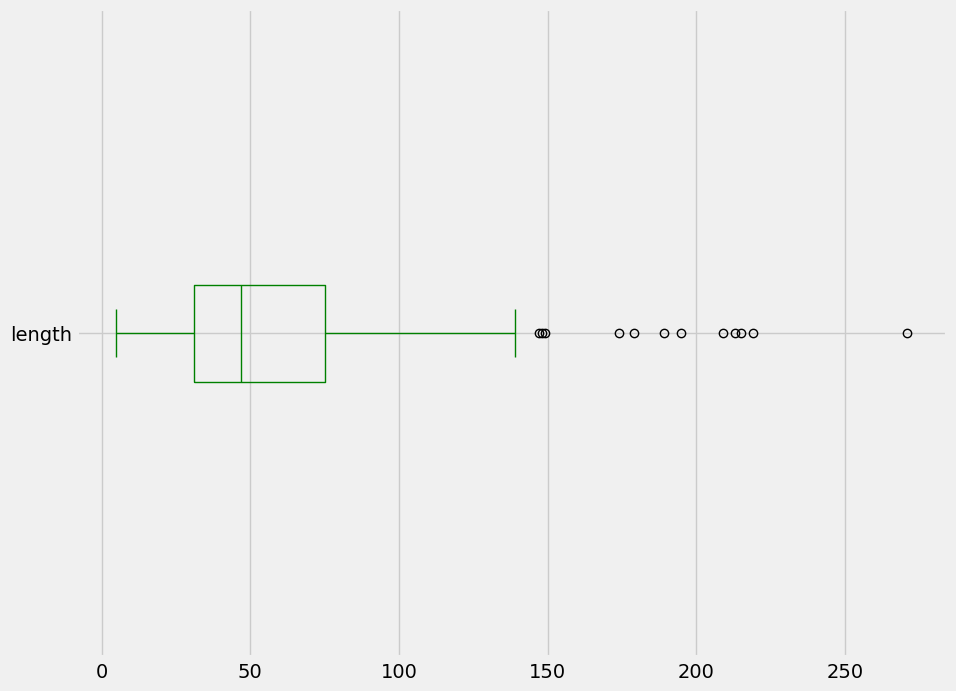

In [171]:
#plotting the box plot
education_df['length'].plot(kind='box', vert=False, color='green')

**Histogram**

<Axes: ylabel='Frequency'>

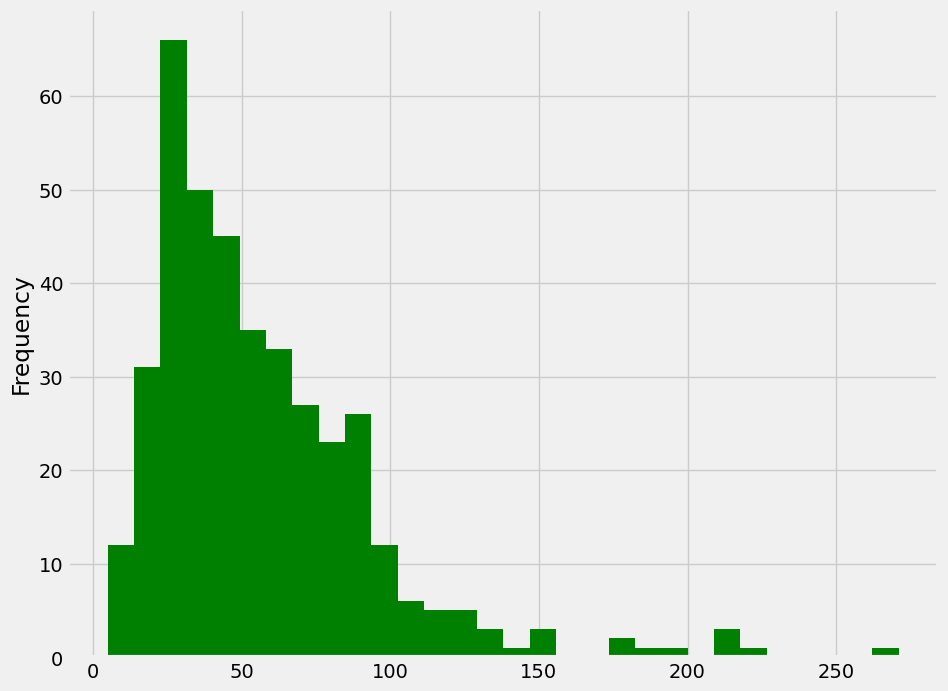

In [170]:
#plotting the histogram
education_df['length'].plot(kind='hist',bins=30,color='green')

<Axes: >

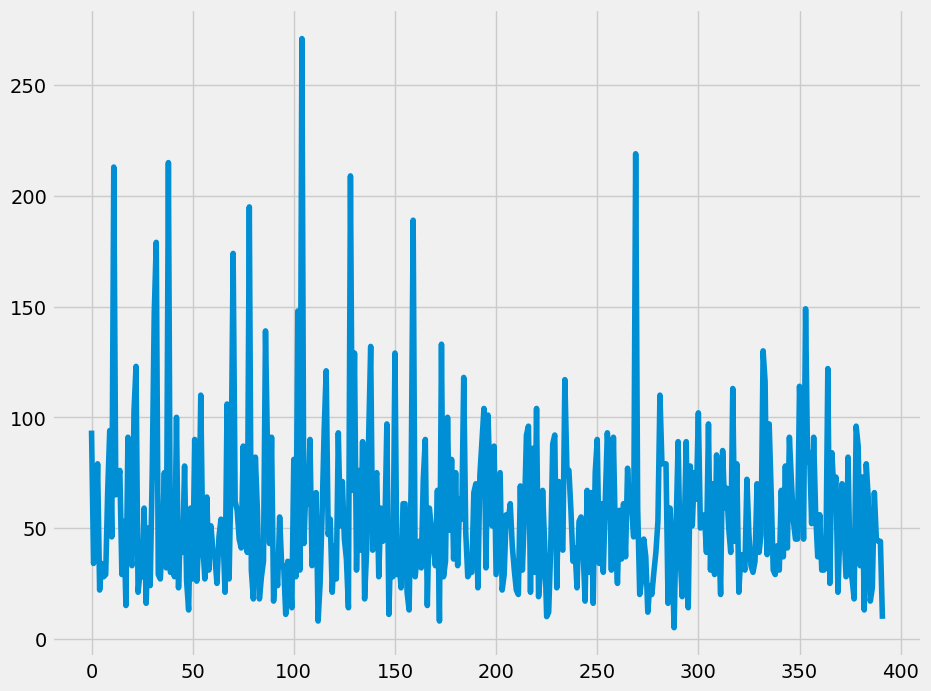

In [172]:
#plot
education_df['length'].plot()

#**3) creating the pipeline**

In [152]:
#creating the pipeline
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

In [137]:
#running the pipeline
education_df['tokens'] = education_df['Titles'].apply(prepare, pipeline=pipeline)


In [138]:

#counting the tokens
education_df['num_tokens'] = education_df['tokens'].map(len)
education_df.head()

,Titles,tokens,num_tokens
0,I’m going back to school after getting out of ...,"[going, back, school, getting, military, assoc...",8
1,Education Stories to Watch in 2024,"[education, stories, watch]",3
2,Units of Study - doesn't work for everyone,"[units, study, work, everyone]",4
3,How Salesforce Apex is Transforming Education ...,"[salesforce, apex, transforming, education, de...",7
4,Education Compensatory,"[education, compensatory]",2


In [140]:
#importing the counter package from collections
from collections import Counter
#counting the words
count=Counter()
education_df['tokens'].map(count.update)
print(count.most_common(5))

[('education', 57), ('school', 43), ('college', 17), ('university', 16), ('system', 15)]


In [142]:
#put the word frequency in  owndataframe for analysis
new_df = pd.DataFrame.from_dict(count, orient='index', columns=['frequency'])
new_df = new_df.query('frequency >= 1')
new_df.index.name = 'words'
#sorting and displaying words and its frequencies
new_df = new_df.sort_values('frequency', ascending=False) # sorting according to frequency
new_df.head(10)

,frequency
words,
education,57
school,43
college,17
university,16
learning,15
system,15
teachers,14
degree,14
student,14


**statistical analysis**

In [143]:
new_df.describe()

,frequency
count,1220.000000
mean,1.831967
std,2.753855
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,57.000000


**Bar plot**

[Text(0.5, 0, 'Frequency'),
 Text(0, 0.5, 'words'),
 Text(0.5, 1.0, 'Most Used Words')]

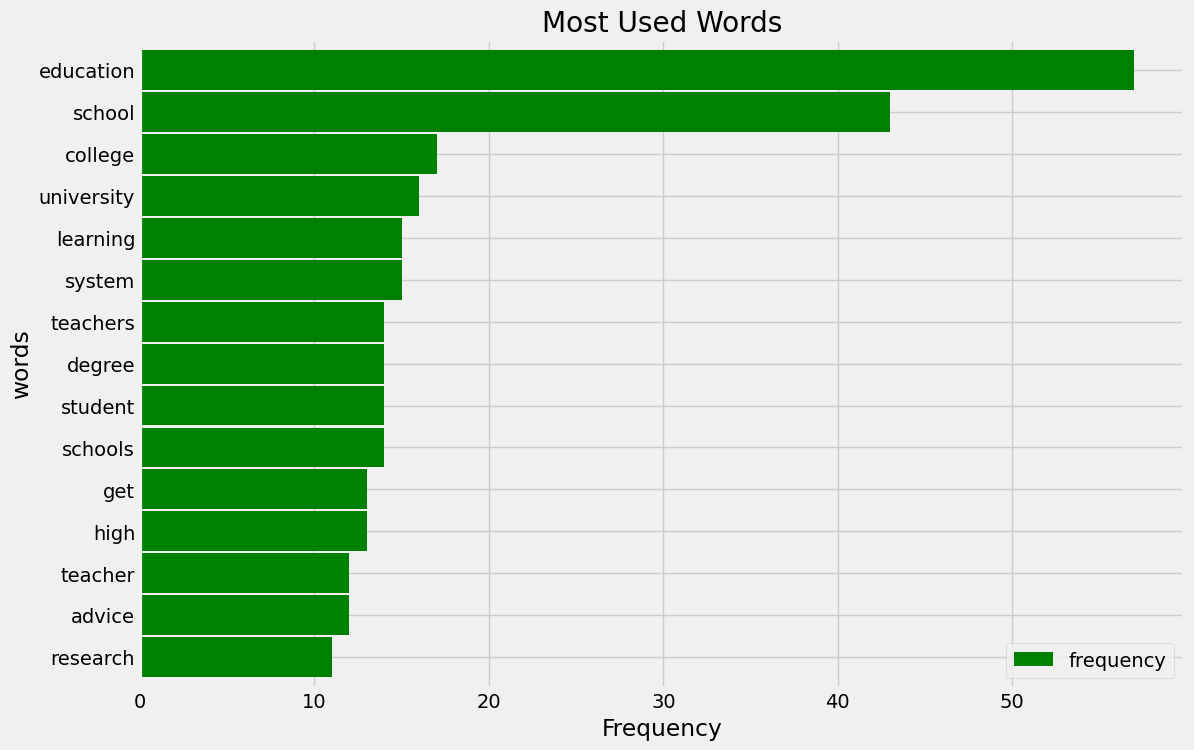

In [146]:
#plotting the bar chat
bplot= new_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8),color='green')
bplot.invert_yaxis()
bplot.set(xlabel='Frequency', ylabel='words', title='Most Used Words')

**creating wordcloud**

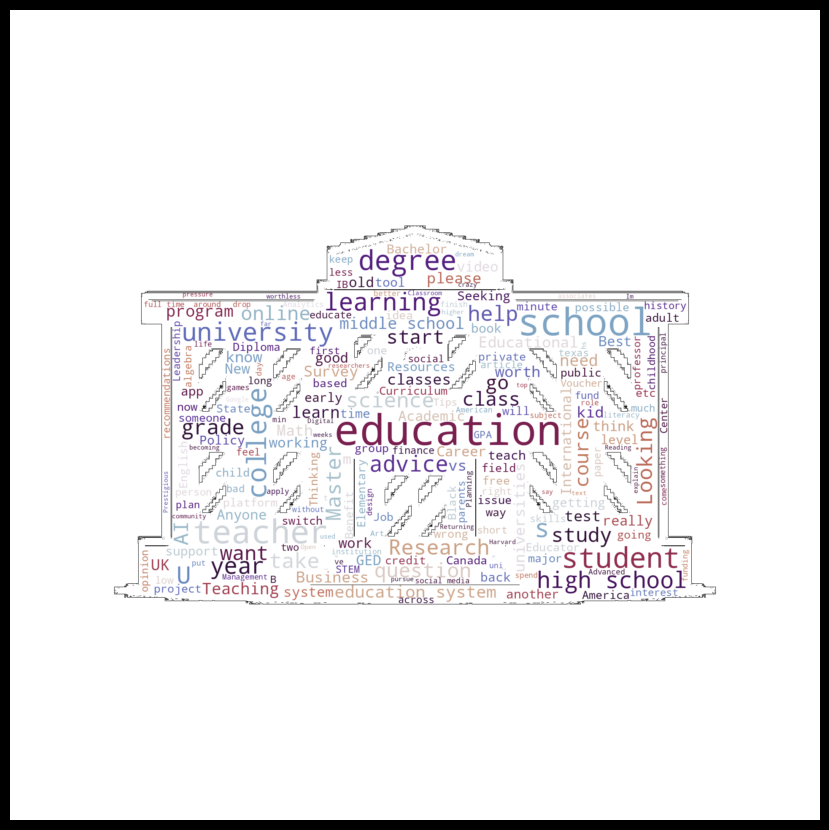

In [151]:
#importing the libraries
from PIL import Image
import numpy as np

text = ' '.join( [twts for twts in education_df['Titles']] )

image = Image.open('school1.jpg')
mask = np.array(image)

max_font_size = 100
min_font_size = 15

wordcloud = WordCloud(width=1000,
                      height = 600,
                      max_words = 1000,
                      stopwords = STOPWORDS,
                      mask = mask,
                      contour_width = 0.01,
                      colormap = 'twilight',
                      max_font_size = max_font_size,
                      min_font_size = min_font_size,
                      background_color = "white").generate(text)

# Display the generated image:

plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");
plt.show();

#**4) Sentiment analysis**

In [225]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
education_df['Subjectivity'] = education_df['Titles'].apply(getSubjectivity)
education_df['Polarity'] = education_df['Titles'].apply(getPolarity)

#Now display data
education_df[['Titles','Subjectivity','Polarity']].head()

,Titles,Subjectivity,Polarity
0,I’m going back to school after getting out of ...,0.333333,-0.3
1,Education Stories to Watch in 2024,0.000000,0.0
2,Units of Study - doesn't work for everyone,0.000000,0.0
3,How Salesforce Apex is Transforming Education ...,0.400000,0.0
4,Education Compensatory,0.000000,0.0


In [222]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

education_df["Insight"] = education_df["Polarity"].apply(getInsight)

education_df[['Titles','Insight','Polarity']].head(10)

,Titles,Insight,Polarity
0,I’m going back to school after getting out of ...,Negative,-0.300
1,Education Stories to Watch in 2024,Neutral,0.000
2,Units of Study - doesn't work for everyone,Neutral,0.000
3,How Salesforce Apex is Transforming Education ...,Neutral,0.000
4,Education Compensatory,Neutral,0.000
5,90s English Class Teaching System?,Neutral,0.000
6,Materials Science Challenges,Neutral,0.000
7,Quiz platform recommendations,Neutral,0.000
8,"Question from a hs dropout, is there any way o...",Positive,0.600
9,Is IB program in DFW ISD system an advantage t...,Negative,-0.125


**VISUALIZING EDUCATION SENTIMENT DISTRIBUTION**

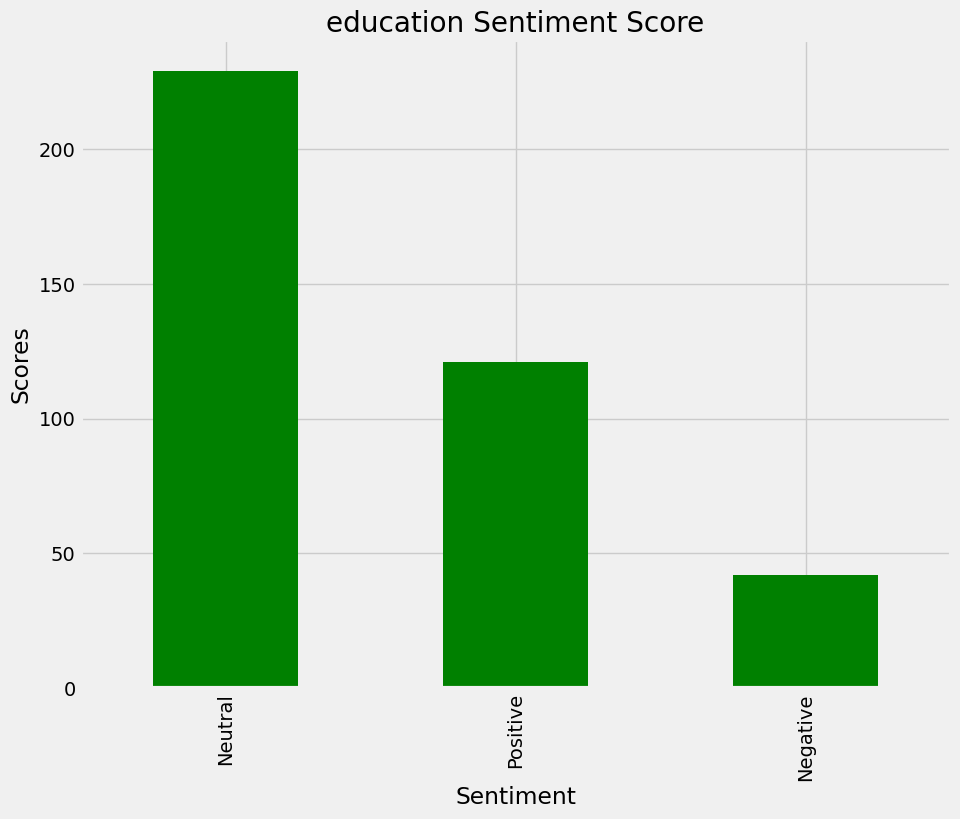

In [188]:
#create visualizations using Seaborn, WordCloud, and Matplotlib with a specific visual style
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Plot the values count of sentiment
plt.title("education Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
education_df["Insight"].value_counts().plot(kind="bar", color="green")
plt.show()


#**6) Bing liu score**

**importing the packages**

In [209]:
#Importing preprocessing module from sklearn
from sklearn import preprocessing
import nltk
#downloads the Opinion Lexicon dataset from NLTK
nltk.download('opinion_lexicon')
#'punkt' tokenizer is a pre-trained unsupervised machine learning model for tokenizing text into words
nltk.download('punkt')

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [210]:
#opinion_lexicon provides access to positive and negative words
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize #word_tokenize is used for tokenization

In [211]:
#set the positive and negative scores to be assigned to words in the word_dict dictionary.
pos_score = 1
neg_score = -1

In [212]:
#Adding the positive words to the dictionary
word_dict = {}
for word in opinion_lexicon.positive():
        word_dict[word] = pos_score       #iterates through the positive words in the Opinion Lexicon and assigns each word a positive score in the dictionary

# Adding the negative words to the dictionary
for word in opinion_lexicon.negative():
        word_dict[word] = neg_score

In [213]:
# Sentiment analysis function using a simple bag-of-words approach
def bing_liu_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())  #word_tokenize splits the text into individual words.
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    return sentiment_score

In [223]:
education_df['Bing_Liu_Score'] = education_df['Titles'].apply(bing_liu_score)

#**Bing Lu Sentiment Score**

In [221]:
#Previewing the sentiment analysis results for the top 10 rows
education_df[["Titles", 'Bing_Liu_Score']].head(20)

,Titles,Bing_Liu_Score
0,I’m going back to school after getting out of ...,-1
1,Education Stories to Watch in 2024,0
2,Units of Study - doesn't work for everyone,1
3,How Salesforce Apex is Transforming Education ...,0
4,Education Compensatory,0
5,90s English Class Teaching System?,0
6,Materials Science Challenges,0
7,Quiz platform recommendations,1
8,"Question from a hs dropout, is there any way o...",0
9,Is IB program in DFW ISD system an advantage t...,1


In [224]:
#Calculating the mean Bing Liu sentiment score
education_df.groupby('Titles').agg({'Bing_Liu_Score':'mean'})

,Bing_Liu_Score
Titles,
"""America’s top universities should abandon their long misadventure into politics, retrain their gaze on their core strengths and rebuild their reputations as centers of research and learning."" CNN's Fareed Zakaria",1.0
1% of Harvard’s endowment would fund free community college in Massachusetts,1.0
17M looking to start my journey,0.0
"19M, looking for ways to educate myself on business ad finance",0.0
2 different views of US Education System,0.0
...,...
teaching experience?,0.0
transferring from an IB school.,0.0
what’s a good text summarizer?,1.0
